In [13]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Common_Experiment_Functions.ipynb

## 4.3. Regularization

In [20]:
accuracy_measures = {}

regularizer_list = ['l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"]=25
    model_name = "Regularizer-" + regularizer
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]




******************************************************
Model: "Regularizer-l1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense-Layer-0 (Dense)        (None, 32)                160       
_________________________________________________________________
Dense-Layer-1 (Dense)        (None, 64)                2112      
_________________________________________________________________
Output-Layer (Dense)         (None, 3)                 195       
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Regularizer-l2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense-Layer-0 (Dense)        (None, 32)                160       
______________________________________________

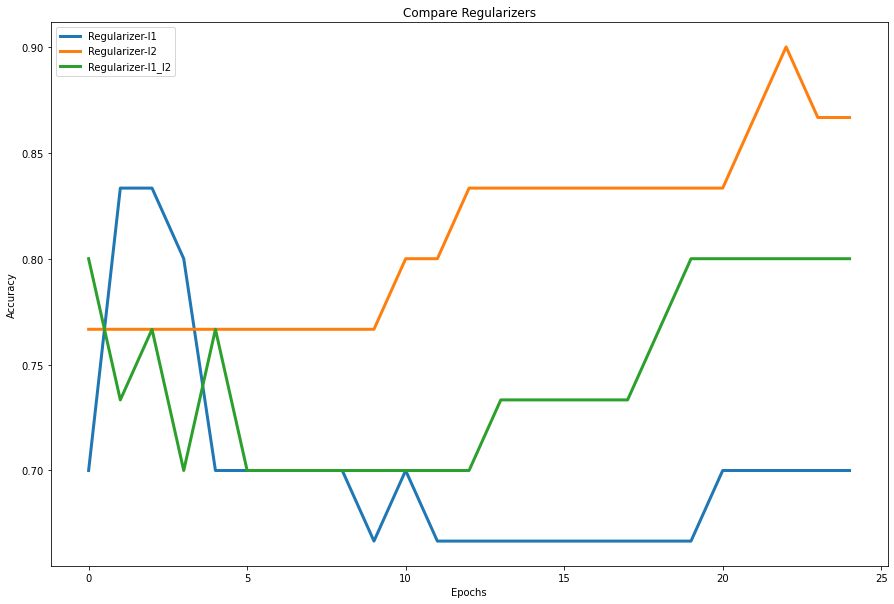

In [21]:
plot_graph(accuracy_measures, "Compare Regularizers")

## 4.5. Dropout

In [24]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    X,Y = get_data()
    
    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"]=25
    model_name="Dropout-" + str(dropout)
    history=create_and_run_model(model_config,X,Y, model_name)
    
    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]



******************************************************
Model: "Dropout-0.0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense-Layer-0 (Dense)        (None, 32)                160       
_________________________________________________________________
Dense-Layer-1 (Dense)        (None, 64)                2112      
_________________________________________________________________
Output-Layer (Dense)         (None, 3)                 195       
Total params: 2,467
Trainable params: 2,467
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Dropout-0.1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense-Layer-0 (Dense)        (None, 32)                160       
____________________________________________________

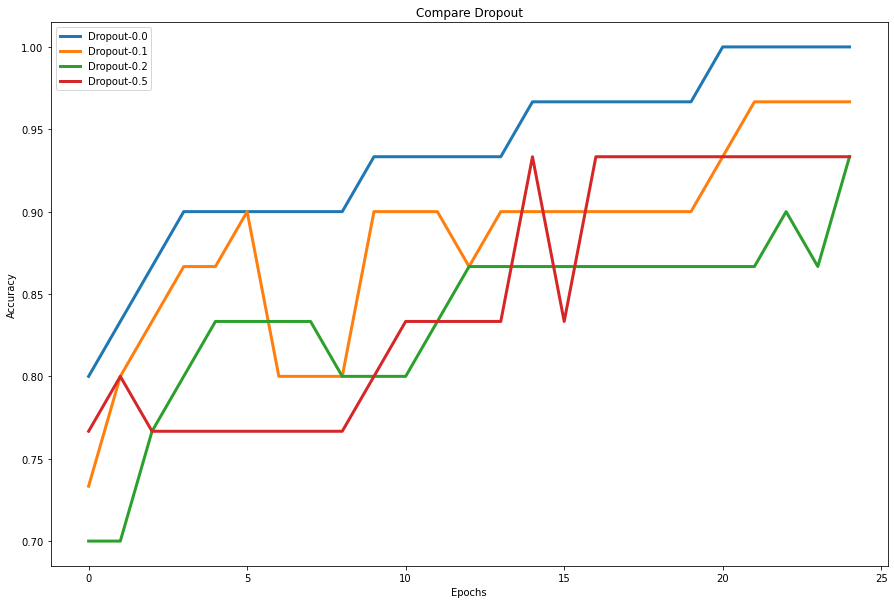

In [25]:
plot_graph(accuracy_measures, "Compare Dropout")